In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Separating Numerical and categorical Columns**

In [58]:
numerical_columns = [num_feature for num_feature in df if df[num_feature].dtype != 'O']

In [20]:
cat_columns = [cat_feature for cat_feature in df if df[cat_feature].dtype == 'O']


**Analyzing the Data**

In [39]:
df.shape

(891, 12)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    int64  
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 83.7+ KB


**Checking the Duplicates and Null Values**

In [45]:
print(df.isnull().sum())
#Checking Duplicates Value

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### Task2

Task 2: Numerical Data Analysis
2. Question: What are the key statistical properties and distributions of the numerical
columns?


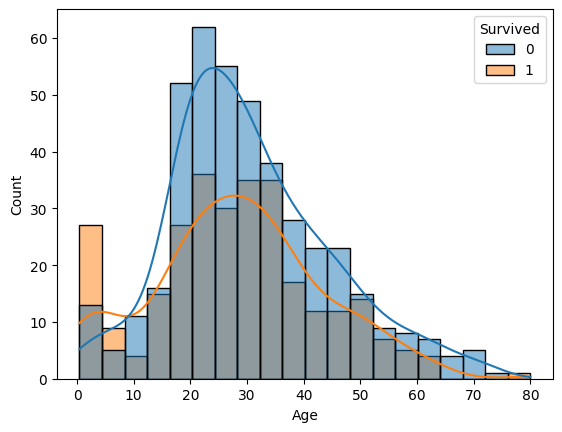

In [50]:
sns.histplot(x=df['Age'] , kde = True , hue = df['Survived'])

plt.show()

This shows that Mostly people of young Age had survived

**Checking the outlier**

<Axes: xlabel='Fare'>

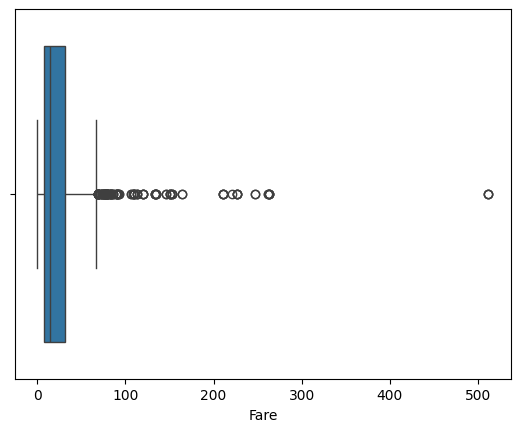

In [41]:
sns.boxplot(x=df['Fare'])

so basically there are outliers in one of the numerical features to be precise Fare column has outliers that we had to removed

In [34]:
q1 = df['Fare'].quantile(0.25)

In [37]:
q3 = df['Fare'].quantile(0.75)

In [38]:
IQR = q3 -q1

In [42]:
L_f = q1-(1.5*IQR)
U_F = q3 +(1.5*IQR)

Using this we can remove outliers by either caping or removing

### Task 3: Categorical Data Analysis


<Axes: xlabel='Sex', ylabel='count'>

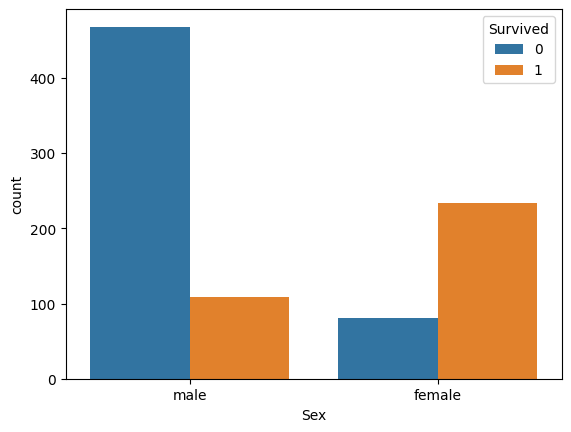

In [52]:
sns.countplot(x = df['Sex'] , hue = df['Survived'])

so we can see that maximum gender who have survived are womens more than 200+ women survived out of 300

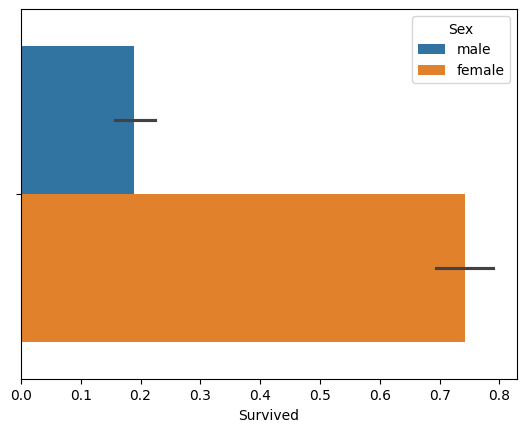

In [55]:
sns.barplot(x=df['Survived'] , hue = df['Sex'])
plt.show()

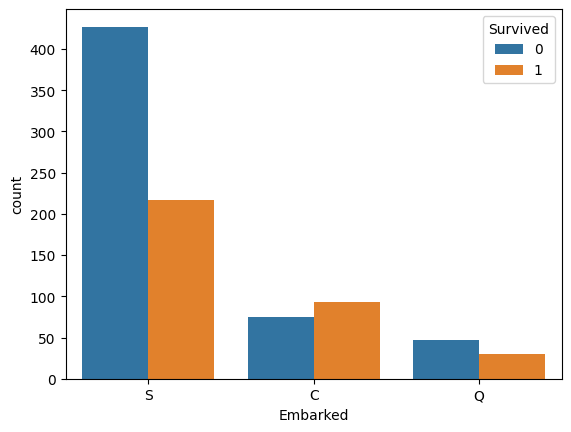

In [57]:
sns.countplot(data = df , x=df['Embarked'] , hue = df['Survived'])
plt.show()

### Task 4: Relationship Between Variables (Bivariate Analysis)

<Axes: >

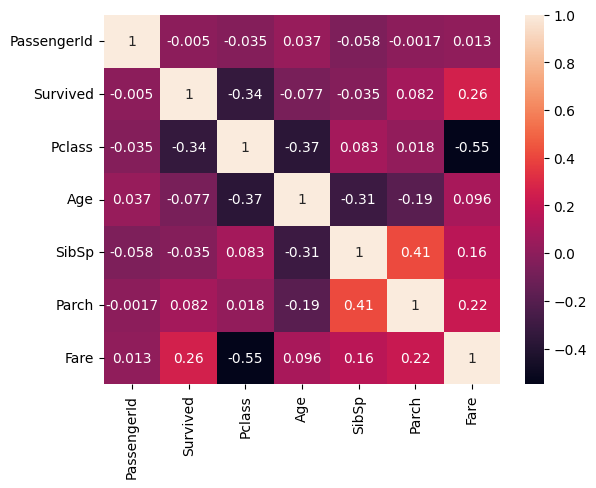

In [61]:
sns.heatmap(df[numerical_columns].corr() , annot=True)


This shows relation of one variable with other like survived has postive relationship with Fare and rest of them mostly negative effect on it

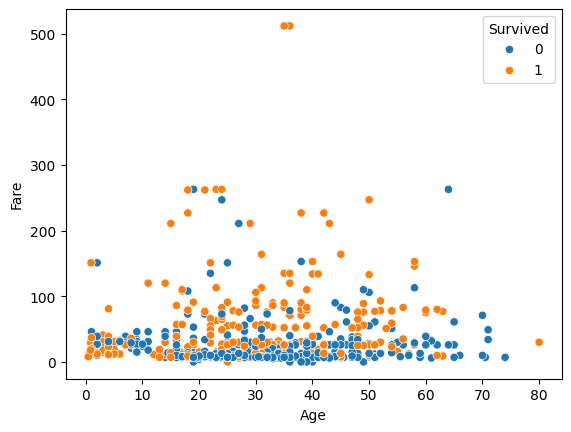

In [66]:
sns.scatterplot(x = df['Age'] ,y =  df['Fare'], hue = df['Survived'])
plt.show()

**Categorical vs Catergorical Column**

<Axes: xlabel='Pclass', ylabel='Survived'>

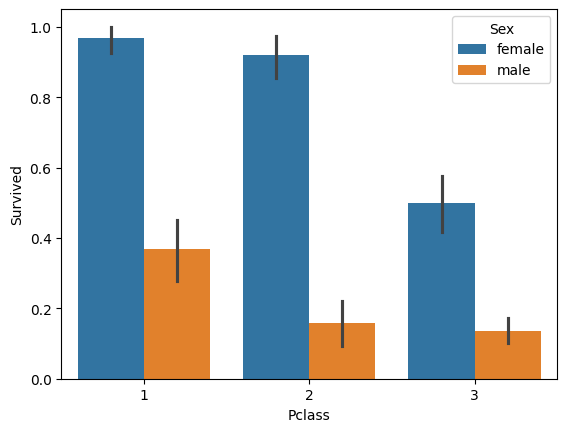

In [70]:
sns.barplot(x=df['Pclass'] , y=df['Survived'] , hue = df['Sex'])

This show mostly women who have survived are from Pclass 1

<Axes: xlabel='Survived', ylabel='Age'>

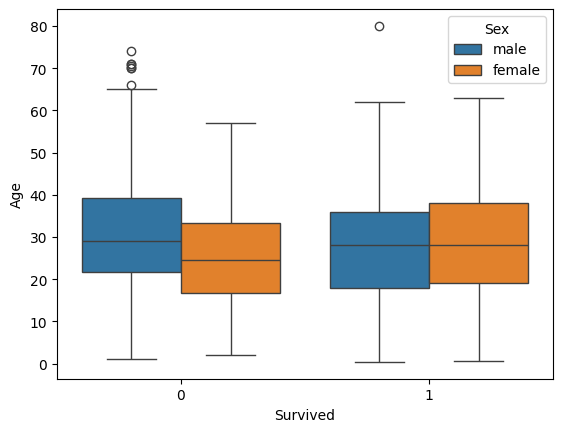

In [73]:
sns.boxplot(y = df['Age'] , x = df['Survived'] , hue = df['Sex'])

### Task 5: Multivariate Analysis

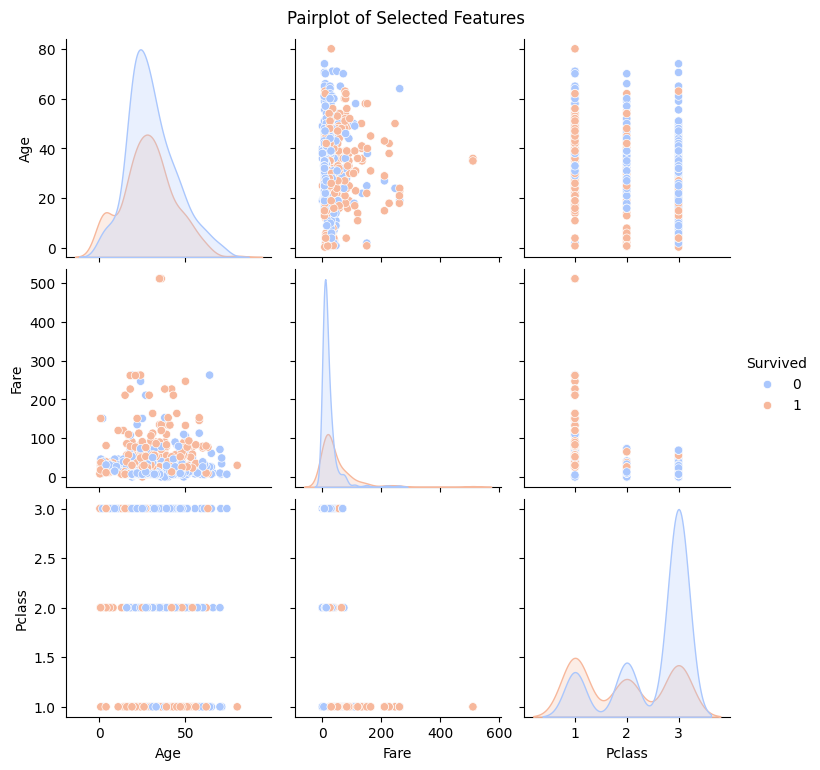

In [74]:
sns.pairplot(df[['Age', 'Fare', 'Pclass', 'Survived']], hue='Survived', palette='coolwarm')
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()